In [24]:
#############
#S. Galli May 2023. Script to plot Planck and SPT 2018 data with respect to the Planck 2018 best-fit data. I adopted an approximation
#to bin the Planck error bars with the same binning as SPT.
#############



%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from scipy.io import FortranFile

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
from head_classes_2018 import *
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as nm
import matplotlib.gridspec as gridspec

#import getdist
#from getdist import plots
import pickle as pkl
from copy import deepcopy
import matplotlib.transforms as transforms
import scipy
from matplotlib import patches
import color_utilities as cu

#import camb
#from camb import model, initialpower

#import sigfig
import seaborn as sns
def cm2inch(cm):
    """Centimeters to inches"""
    return cm *0.393701
def rgb2hex(r,g,b):
    #print (r,g,b)
    N=255.0
    return '#%02x%02x%02x' % (int(r*N), int(g*N), int(b*N))
#print(cu.nice_colors(0))
ci = [rgb2hex(*cu.nice_colors(i)) for i in range(10)]
params = {'backend': 'pdf',
          'axes.labelsize': 9,
          'font.size': 8,
          'legend.fontsize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'ytick.major.pad': 4,
          'xtick.major.pad': 4,
          'text.usetex': True,
          'font.family': 'sans-serif',
          # free font similar to Helvetica                                                                                                                                                                   
          'font.sans-serif': 'FreeSans'}
%run './rebin_py3.py'

### Models to plot

In [26]:

# Put here the name of the filenames you would like to show in the plot as a difference with respect to Planck 2018 LCDM best fit.
dirdata='TTTEEE_2018_datapoints/'
filenames=[['Planck 2018 $A_L$','base_Alens_plikHM_TTTEEE_lowl_lowE.minimum.theory_cl']]
mods={}
for ff in filenames:
    mods[ff[0]]=nm.loadtxt(dirdata+ff[1])
    



# SPT-3G bandpowers

In [25]:
spt=nm.loadtxt(dirdata+"SPT3G_2018_TTTEEE_MV_bdp.txt") 
#(1) ell_min, (2) ell_max, (3) TT ell_center, (4) TT, (5) sigma_TT, (6) TE ell_center, (7) TE, (8) sigma_TE, (9) EE ell_center, (10) EE, (11) sigma_EE.
sind={'ellTT':2,'TT':3,'errTT':4,'ellTE':5,'TE':6,'errTE':7,'ellEE':8,'EE':9,'errEE':10}
#pol='TT'
#nn=44; plt.plot(spt[:nn,sind['ell'+pol]],spt[:nn,sind[pol]])
#print(spt[nn,sind['ell'+pol]],spt[nn,sind[pol]])

### Planck CMB best fit binned with SPT-3G windows and zero foregrounds (slightly different per frequency because windows include beams)

In [19]:
SPTth=nm.loadtxt(dirdata+"base_plik_rd12_HM_v22_TTTEEE_lowlv3_simall_EE_forSPT3GTTTEEE_zeroforegrounds/SPT3G_Y1_TTEETE_bandpowers_columns.txt")
#plt.plot(spt[:,sind['ellEE']],spt[:,sind['EE']])
thind={'TT':1,'TE':2,'EE':3} #indeces in the power spectrum file

###  SPT residuals


In [20]:
resspt={}
pols=['TT','TE','EE']

for pol in pols:
    resspt[pol]=spt[:,sind[pol]]-SPTth[:,thind[pol]]

### Planck

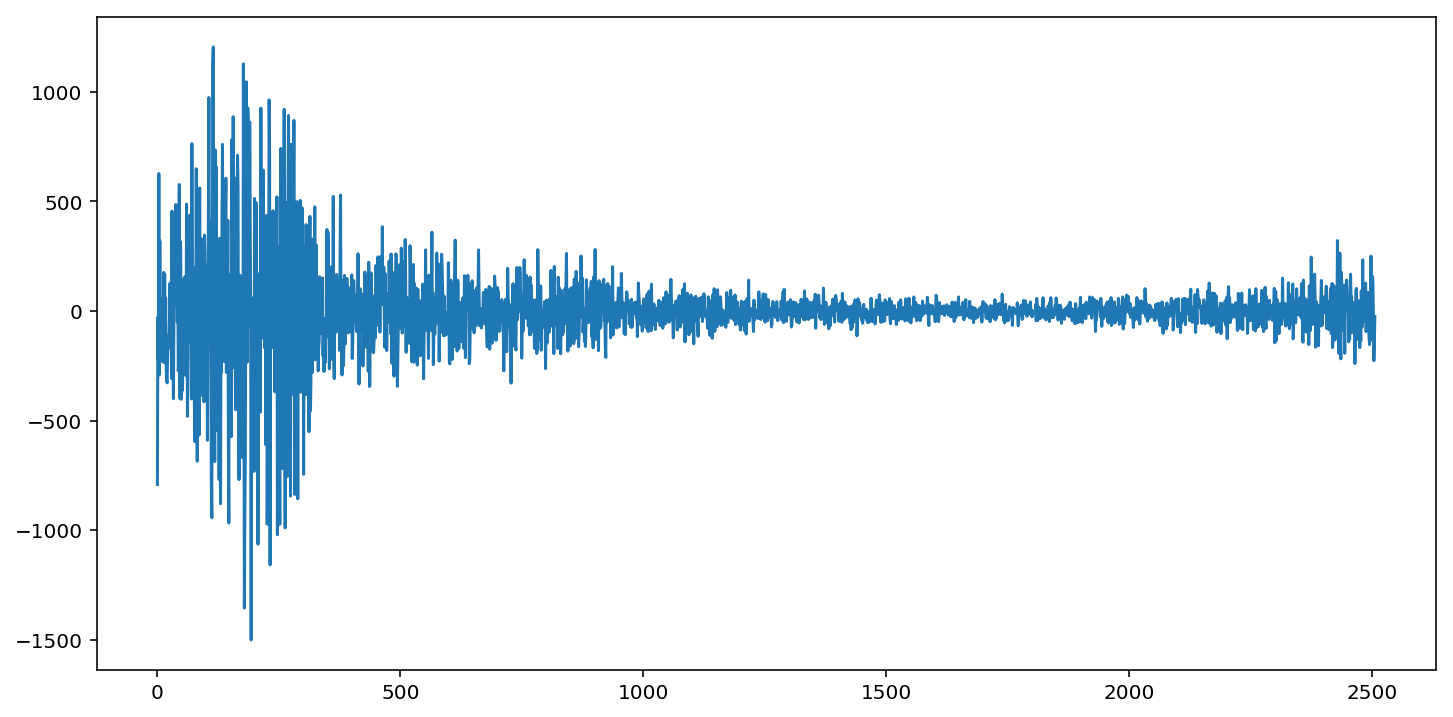

In [21]:

PLb={}
PL={}
temp=nm.loadtxt(dirdata+'COM_PowerSpect_CMB-TE-full_R3.01.txt')
PL['TE']=temp[:,0:3]
temp=nm.loadtxt(dirdata+'COM_PowerSpect_CMB-TT-full_R3.01.txt')
PL['TT']=temp[:,0:3]

temp=nm.loadtxt(dirdata+'COM_PowerSpect_CMB-EE-full_R3.01.txt')
PL['EE']=temp[:,0:3]
planckth=nm.loadtxt(dirdata+'base_plikHM_TTTEEE_lowl_lowE_lensing.minimum.theory_cl')

plt.plot(PL['TT'][:,1]-planckth[:,1])



### Planck rebinning

(46, 2507)
TT

(40, 1995)
TE

(40, 1995)
EE



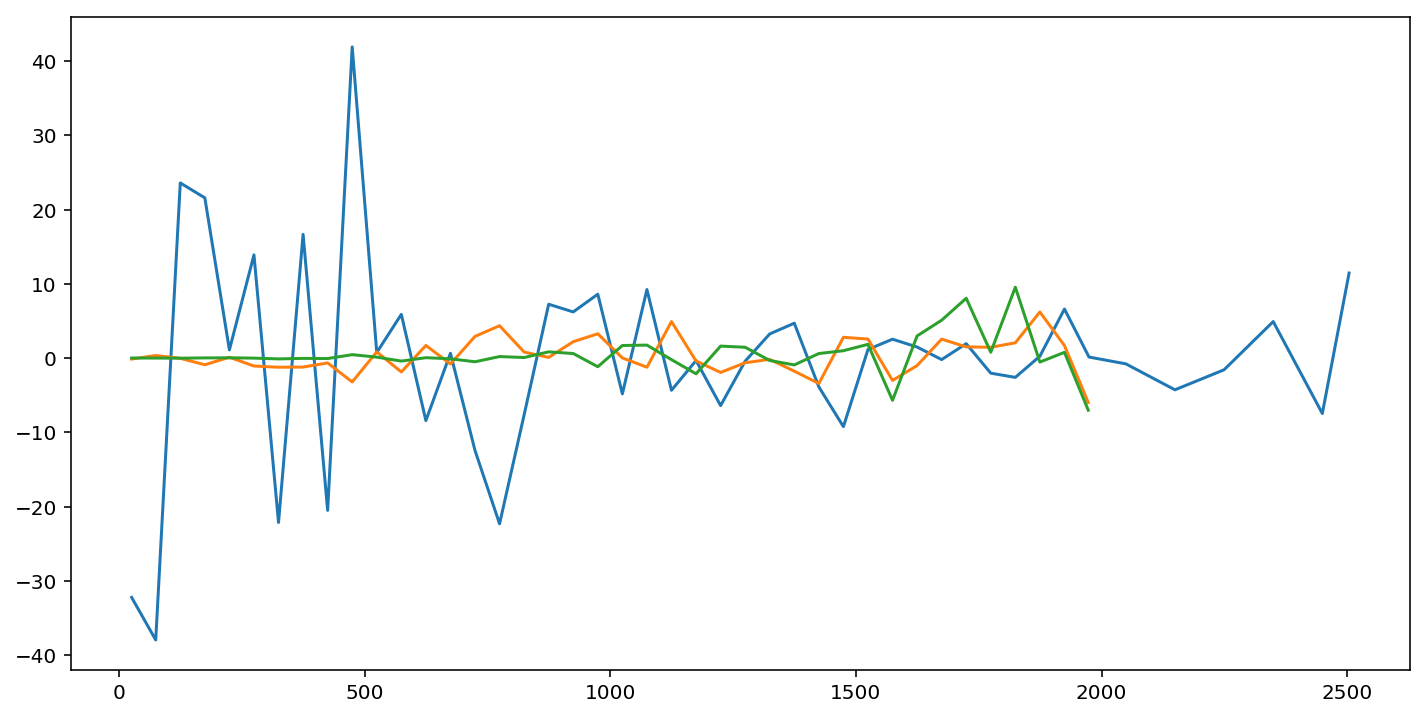

In [22]:

relcuts=nm.array(list(range(0,2000,50))+list(range(2000,3000,100)))
planckthb={}
resplanck={}
for pol in ['TT','TE','EE']:
    bins=get_l_rebinning(relcuts,PL[pol][0,0],PL[pol][-1,0],ellb=PL[pol][:,0],Dl=True)
    print(nm.shape(bins))

    PLb[pol]=nm.zeros((bins.shape[0],3))
    for ii in range(2):
        PLb[pol][:,ii]=rebin_vec(PL[pol][:,ii],bins)
    print(pol),print()
    cov=rebin_diag_cov(PL[pol][:,2],bins,var=False)
###Note this is an approximate way of getting errors!!!!! Not with the full covmat
    PLb[pol][:,2]=nm.sqrt(nm.diagonal(cov)) 
    binsth=get_l_rebinning(relcuts,PL[pol][0,0],PL[pol][-1,0],ellb=planckth[:,0],Dl=True)

    planckthb[pol]=rebin_vec(planckth[:,thind[pol]],binsth)

    plt.plot(PLb[pol][:,0],PLb[pol][:,1]-planckthb[pol])
    resplanck[pol]=PLb[pol][:,1]-planckthb[pol]


# Plot of residuals

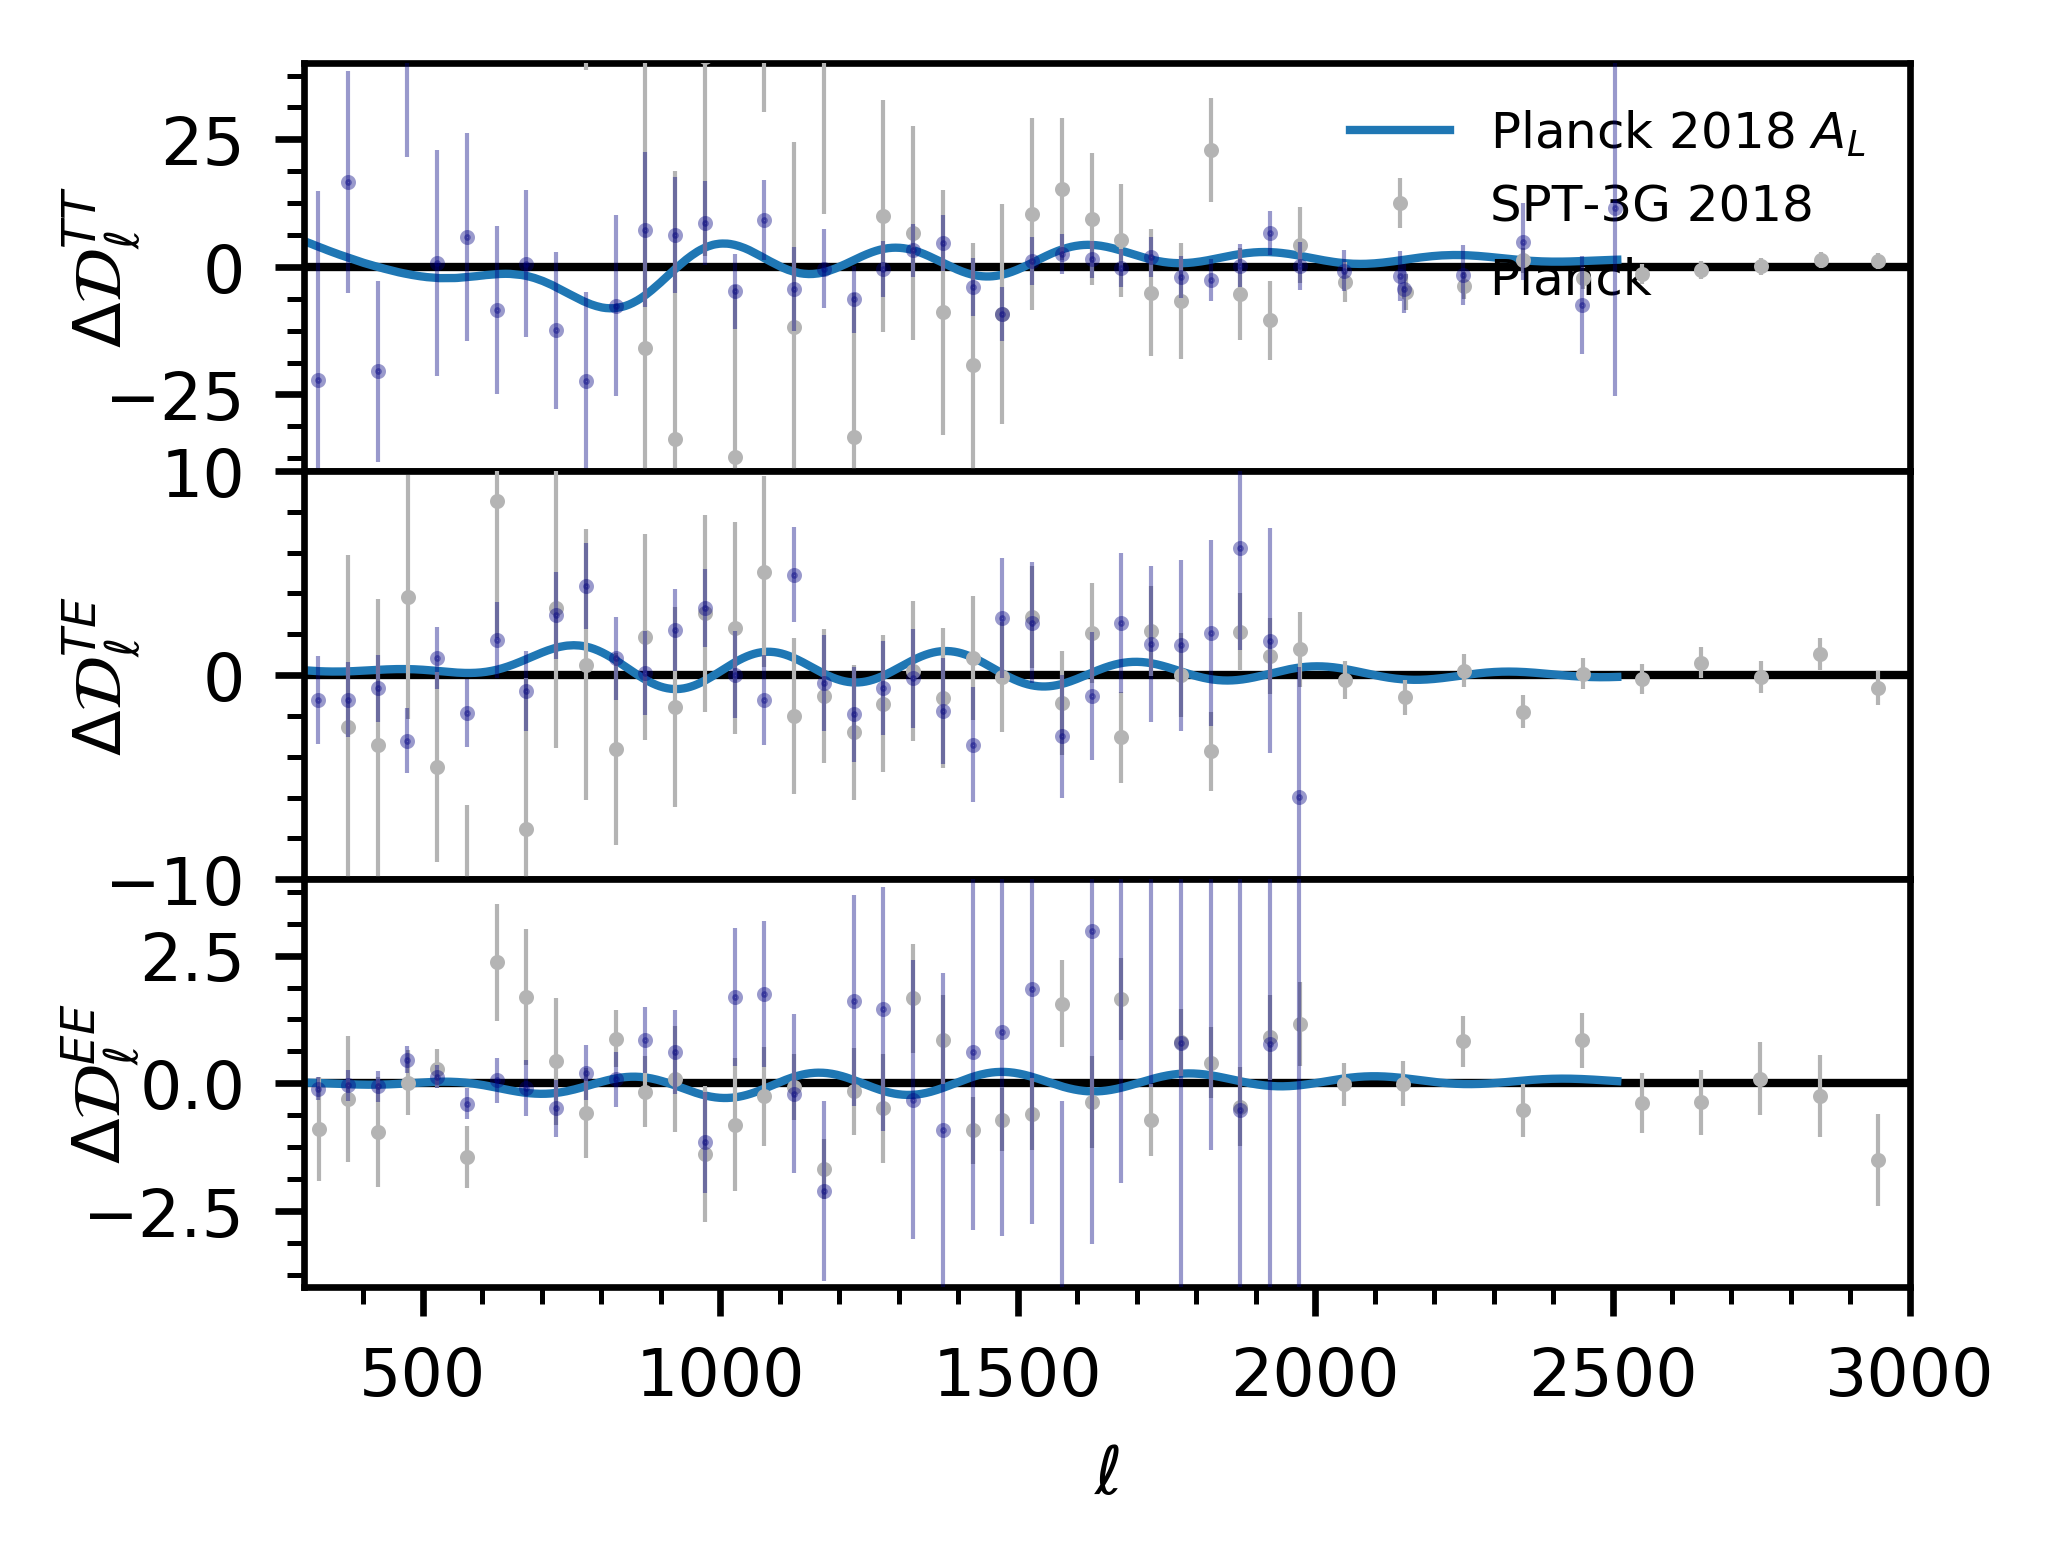

In [23]:
fs=8
##C60F7B' # '#FF3366'
cc=['k','#41D3BD','#6495ed','#C60F7B','#41D3BD','#8c7bf0','#41D3BD','#FFAE03']
#plotexp={'Planck':['#6495ed',1.5],'ACTDR4':['#8c7bf0',1],'SPT-3G 1yr':['#FFAE03',1]}#'#ffcf00'}                               
width=8
ww=cm2inch(width)
hh=cm2inch(width*0.8)
figsize=(ww,hh)

ls=['-','--',':','--']
f = plt.figure(figsize=figsize,dpi=300)
#fs=12
labelx = -0.1  # axes coords
polstoplot=['TT','TE','EE']
gs = gridspec.GridSpec(len(polstoplot),1)
f.set_facecolor('white')
f.subplots_adjust(wspace=0, hspace=0)
#lims={'TE':[-1.99,1.6],'EE':[-0.15,0.22]}
#lims={'TE':[-3.1,2],'EE':[-0.3,0.3]}
lims={'TT':[-40,40],'TE':[-4,4],'EE':[-0.3,0.3]}



#res['EE']=nm.loadtxt('../SPT3G_residuals/Silvia_best_fit/LCDMSPT3GY1residualsEE')
#res['TE']=nm.loadtxt('../SPT3G_residuals/Silvia_best_fit/LCDMSPT3GY1residualsTE')

polstoplot=['TT','TE','EE']

for npol,pol in enumerate(polstoplot):
    ax = f.add_subplot(gs[npol,:])
    fact=1
    #   ax.plot(bfnl[:,0],fact*(bfnb[:,indpol[pol]]-bfnl[:,indpol[pol]]),lw=0.8,alpha=0.8,color=ci[0],ls=ls[0],label=r'$\Lambda CDM+b$')
    #   ax.plot(bfl[:,0],fact*(bfnny[:,indpol[pol]]-bfnl[:,indpol[pol]]),lw=0.8,alpha=0.8,color=ci[2],ls=ls[1],label=r'$\Lambda CDM+N_{\rm eff}+Y_{\rm He}$')
    #   ax.plot(bfnl[:,0],(bfnk[:,indpol[pol]])*0.,lw=0.8,alpha=0.8,color='gray',ls='-',zorder=0)
    plt.errorbar(spt[:,sind['ell'+pol]],resspt[pol],spt[:,sind['err'+pol]],label='SPT-3G 2018',marker='o',ms=0.8,lw=0.5,zorder=5,c='#b4b4b4',ls='')
    plt.errorbar(PLb[pol][:,0],resplanck[pol],PLb[pol][:,2],label='Planck',marker='o',ms=0.8,lw=0.5,zorder=6,c='#000080',ls='',alpha=0.4)
    for ff in mods.keys():
        plt.plot(planckth[:,0],mods[ff][:,thind[pol]]-planckth[:,thind[pol]],label=ff,lw=1,zorder=1)

    ##b4b4b4
    ax.set_ylabel(r'$\Delta\mathcal{D}_\ell^{'+pol+'}$',fontsize=fs)
    ax.yaxis.set_label_coords(labelx, 0.5)
    if not pol==polstoplot[-1]:
        ax.set_xticks([])
    if pol==polstoplot[0]:
        plt.legend(frameon=False,prop={'size': fs-2},loc='upper right')
    lims={'TT':[-40,40],'TE':[-10,10],'EE':[-4,4]}
    xmin=300
    ax.set_ylim(lims[pol][0],lims[pol][1])
    ax.set_xlim(xmin,3000)
    ax.tick_params(axis='both', which='major', labelsize=fs)#,labelbottom=labot)
    ax.tick_params(axis='both',which='minor')
    plt.minorticks_on()
    plt.plot([xmin,3000],[0,0],c='k',lw=1,zorder=0)


    #  ax.plot(dl[ff][:,0]-30,dl[ff][:,ind[pol]],lw=1,ls=':',color='orange',label=labextra)
f.subplots_adjust(left=0.14,top=0.97,bottom=0.16,right=0.99)


ax.set_xlabel(r'$\ell$',fontsize=fs)
plt.savefig('difference_BF_SPTTTTEEE_Planck.pdf')

plt.show()